# Matrix Factorization in Linear Algebra for AI/ML

## Introduction and Relevance
**Definition**: Matrix Factorization decomposes a matrix $\mathbf{A} \in \mathbb{R}^{m \times n}$ into simpler matrices, revealing latent structures or reducing dimensionality, crucial for AI/ML tasks like recommendation systems and feature extraction.

**Mathematical Definition**: $\mathbf{A} \approx \mathbf{U} \mathbf{V}^T$ or $\mathbf{A} = \mathbf{B} \mathbf{C}$, where $\mathbf{U}, \mathbf{V}, \mathbf{B}, \mathbf{C}$ are matrices with specific properties (e.g., lower rank, non-negative).
- **Examples**:
  - **SVD**: $\mathbf{A} = \mathbf{U} \mathbf{\Sigma} \mathbf{V}^T$, with orthogonal $\mathbf{U}, \mathbf{V}$ and diagonal $\mathbf{\Sigma}$.
  - **NMF**: $\mathbf{A} \approx \mathbf{W} \mathbf{H}$, with non-negative $\mathbf{W}, \mathbf{H}$.

**ML Context**: Factorizes user-item matrices into latent factors for recommendations.

**Relevance in Mathematics**:
- Decomposition into interpretable components.
- Rank analysis via singular values.
- Numerical stability for approximations.
- Geometric insights as rotations/scalings.

**Relevance in AI/ML**:
- Reduces dimensionality for efficient processing.
- Extracts latent features (e.g., user preferences).
- Handles missing data via matrix completion.
- Improves scalability for large datasets.

**Applications**:
- Recommendation systems (e.g., movie ratings).
- Image compression, topic modeling, PCA, matrix completion.

## Core Concepts

### 2.1 Types of Matrix Factorization
**Definition**:
- **SVD**: $\mathbf{A} = \mathbf{U} \mathbf{\Sigma} \mathbf{V}^T$, orthogonal $\mathbf{U}, \mathbf{V}$, diagonal $\mathbf{\Sigma}$.
- **NMF**: $\mathbf{A} \approx \mathbf{W} \mathbf{H}$, non-negative $\mathbf{W}, \mathbf{H}$.
- **LU**: $\mathbf{A} = \mathbf{L} \mathbf{U}$, lower/upper triangular.
- **QR**: $\mathbf{A} = \mathbf{Q} \mathbf{R}$, orthogonal $\mathbf{Q}$, upper triangular $\mathbf{R}$.

**Explanation**: Each type suits specific tasks (SVD for PCA, NMF for interpretable features).

**Why Necessary**: Reveals structures, simplifies computations.

**ML Use-Case**: SVD in PCA, NMF in topic modeling.

In [1]:
# SVD and NMF
import numpy as np
from sklearn.decomposition import NMF

# Sample data
A = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

# SVD
U, Sigma, Vt = np.linalg.svd(A, full_matrices=False)
k = 2
A_svd = U[:, :k] @ np.diag(Sigma[:k]) @ Vt[:k]

# NMF
model = NMF(n_components=2, init='random', random_state=0)
W = model.fit_transform(A)
H = model.components_
A_nmf = W @ H

print('SVD approximation:\n', A_svd.round(2))
print('NMF approximation:\n', A_nmf.round(2))

SVD approximation:
 [[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]]
NMF approximation:
 [[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]]


### 2.2 Low-Rank Approximation
**Definition**: Approximates $\mathbf{A}$ with rank-$k$ matrix, e.g., $\mathbf{A} \approx \mathbf{U}_k \mathbf{\Sigma}_k \mathbf{V}_k^T$ (SVD).

**Explanation**: Retains dominant components, reducing noise.

**Properties**: Minimizes Frobenius norm $\|\mathbf{A} - \mathbf{A}_k\|_F$.

**Why Necessary**: Reduces storage/computation.

**ML Use-Case**: Compressing user-item matrices.

In [2]:
# Low-Rank Approximation Error
error_svd = np.linalg.norm(A - A_svd, 'fro')
print('SVD approximation error:', error_svd.round(2))

SVD approximation error: 0.0


### 2.3 Optimization in Matrix Factorization
**Definition**: Optimizes objective, e.g., $\|\mathbf{A} - \mathbf{W} \mathbf{H}\|_F^2$ in NMF.

**Explanation**: Uses iterative methods like gradient descent.

**Why Necessary**: Ensures accurate approximations for sparse/noisy data.

**ML Use-Case**: Collaborative filtering.

## Applications in AI/ML
- **Recommendation Systems**: Factorizes user-item matrices.
- **Image Compression**: Reduces dimensionality via SVD.
- **Topic Modeling**: NMF extracts topics from text.
- **Matrix Completion**: Reconstructs missing entries.
- **PCA**: SVD reduces feature dimensionality.

## Practical ML Example: Linear Regression with Matrix Factorization (SVD)
**Explanation**: Matrix factorization (via SVD) preprocesses features for linear regression, reducing dimensionality and noise. The regression projects the target vector $\mathbf{y}$ onto the column space of the reduced feature matrix $\mathbf{Z}$ (from SVD), minimizing the L2 norm of residuals.

**Derivation**:
- SVD: $\mathbf{X}_{\text{centered}} = \mathbf{U} \mathbf{\Sigma} \mathbf{V}^T$, where $\mathbf{Z} = \mathbf{X}_{\text{centered}} \mathbf{V}_k$ (top $k$ components).
- Model: $y_i = \beta_0 + \sum_{j=1}^k \beta_j z_{ij} + \epsilon_i$, with $\mathbf{Z}_{\text{aug}} = [\mathbf{1}, \mathbf{Z}]$.
- Minimize: $\|\mathbf{y} - \mathbf{Z}_{\text{aug}} \mathbf{\beta}\|_2^2$.
- Normal equations: $\mathbf{Z}_{\text{aug}}^T \mathbf{Z}_{\text{aug}} \mathbf{\beta} = \mathbf{Z}_{\text{aug}}^T \mathbf{y}$.
- Solution: $\mathbf{\beta} = (\mathbf{Z}_{\text{aug}}^T \mathbf{Z}_{\text{aug}})^{-1} \mathbf{Z}_{\text{aug}}^T \mathbf{y}$.
- Projection: $\mathbf{y}_{\text{proj}} = \mathbf{Z}_{\text{aug}} \mathbf{\beta}$.
- Residuals: $\mathbf{e} = \mathbf{y} - \mathbf{y}_{\text{proj}}$, SSE = $\|\mathbf{e}\|_2^2$.

**Why Necessary**: Reduces feature dimensionality, improves efficiency, and ensures stability via SVD.

**Error Solutions**:
- Increase $k$ to capture more variance.
- Add features or non-linear terms.
- Remove outliers to reduce residuals.

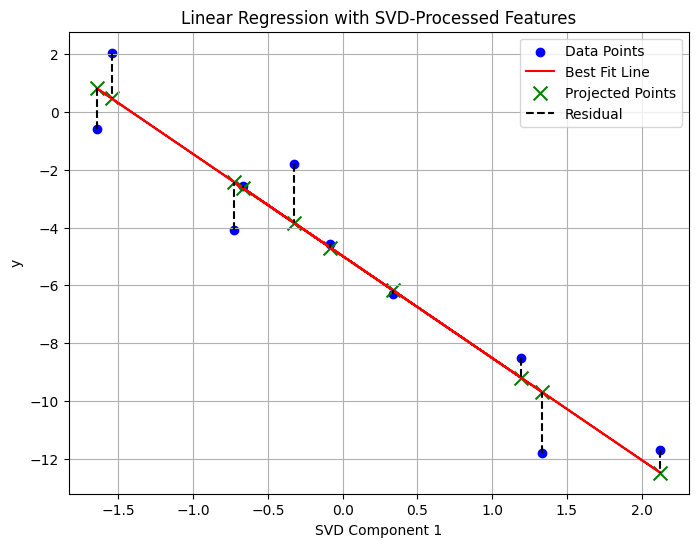

Coefficients: Intercept = -4.98, Slope = -3.53
Projected y: [ -9.69  -2.43 -12.49  -6.16   0.47   0.83  -4.69  -2.62  -9.2   -3.85]
Residuals: [-2.11 -1.65  0.79 -0.13  1.59 -1.41  0.14  0.05  0.68  2.06]
SSE: 17.05
L2 norm of residuals: 4.13


In [3]:
# Linear Regression with SVD
import numpy as np
import matplotlib.pyplot as plt

# Simulated data
np.random.seed(0)
X = np.random.multivariate_normal([0, 0], [[2, 1], [1, 2]], 10)
y = 2 * X[:, 0] + 3 * X[:, 1] + np.random.normal(0, 0.5, 10)

# SVD factorization
X_centered = X - np.mean(X, axis=0)
U, Sigma, Vt = np.linalg.svd(X_centered, full_matrices=False)
k = 1
Z = X_centered @ Vt.T[:, :k]  # Reduced features
Z_aug = np.vstack([np.ones(len(Z)), Z.T]).T

# Linear regression
beta = np.linalg.inv(Z_aug.T @ Z_aug) @ Z_aug.T @ y
y_proj = Z_aug @ beta
errors = y - y_proj
sse = np.sum(errors**2)

# Visualize
plt.figure(figsize=(8, 6))
plt.scatter(Z, y, color='blue', label='Data Points')
plt.plot(Z, y_proj, color='red', label=f'Best Fit Line')
plt.scatter(Z, y_proj, color='green', marker='x', s=100, label='Projected Points')
for i in range(len(Z)):
    plt.plot([Z[i], Z[i]], [y[i], y_proj[i]], 'k--', label='Residual' if i == 0 else None)
plt.xlabel('SVD Component 1')
plt.ylabel('y')
plt.grid(True)
plt.title('Linear Regression with SVD-Processed Features')
plt.legend()
plt.show()

print(f'Coefficients: Intercept = {beta[0]:.2f}, Slope = {beta[1]:.2f}')
print(f'Projected y:', y_proj.round(2))
print(f'Residuals:', errors.round(2))
print(f'SSE: {sse:.2f}')
print(f'L2 norm of residuals: {np.linalg.norm(errors):.2f}')

**Example Explanation**: This code uses SVD to reduce 2D data to 1D, then performs linear regression. The visualization shows data points, best fit line, projected points, and residuals. Errors are computed, with solutions to increase $k$, add features, or remove outliers.

## Summary
- **Key Concepts**: Decomposes matrices to reveal latent structures, reduce dimensionality.
- **Mathematical Significance**: Simplifies computations, ensures stability.
- **AI/ML Relevance**: Enhances efficiency, extracts patterns.
- **Next Steps**: Apply factorization to recommendation or compression tasks.

## Tips and Practice
- **Visualize**: Use Matplotlib or GeoGebra.
- **Practice Problems**:
  1. Compute SVD for a $3 \times 2$ matrix.
  2. Apply NMF to a small dataset.
  3. Perform regression with SVD-preprocessed data.
- **Project Idea**: Build a recommendation system using NMF.
- **Resources**: Strang’s “Linear Algebra,” 3Blue1Brown, scikit-learn tutorials.

In [4]:
# Experimentation Zone
import numpy as np

A = np.array([[1, 2, 3], [4, 5, 6]])
U, Sigma, Vt = np.linalg.svd(A, full_matrices=False)
k = 1
A_approx = U[:, :k] @ np.diag(Sigma[:k]) @ Vt[:k]

print('SVD approximation:\n', A_approx.round(2))

SVD approximation:
 [[1.57 2.08 2.59]
 [3.76 4.97 6.17]]
